# Expansion: A machine learning approach for the classification of cardiac arrhythmia
The aim of the second part of this project is to improve and creatively expand the results we obtained after our individual work.

##### Igor Aradski, Eleonora Detić, Ana Terović

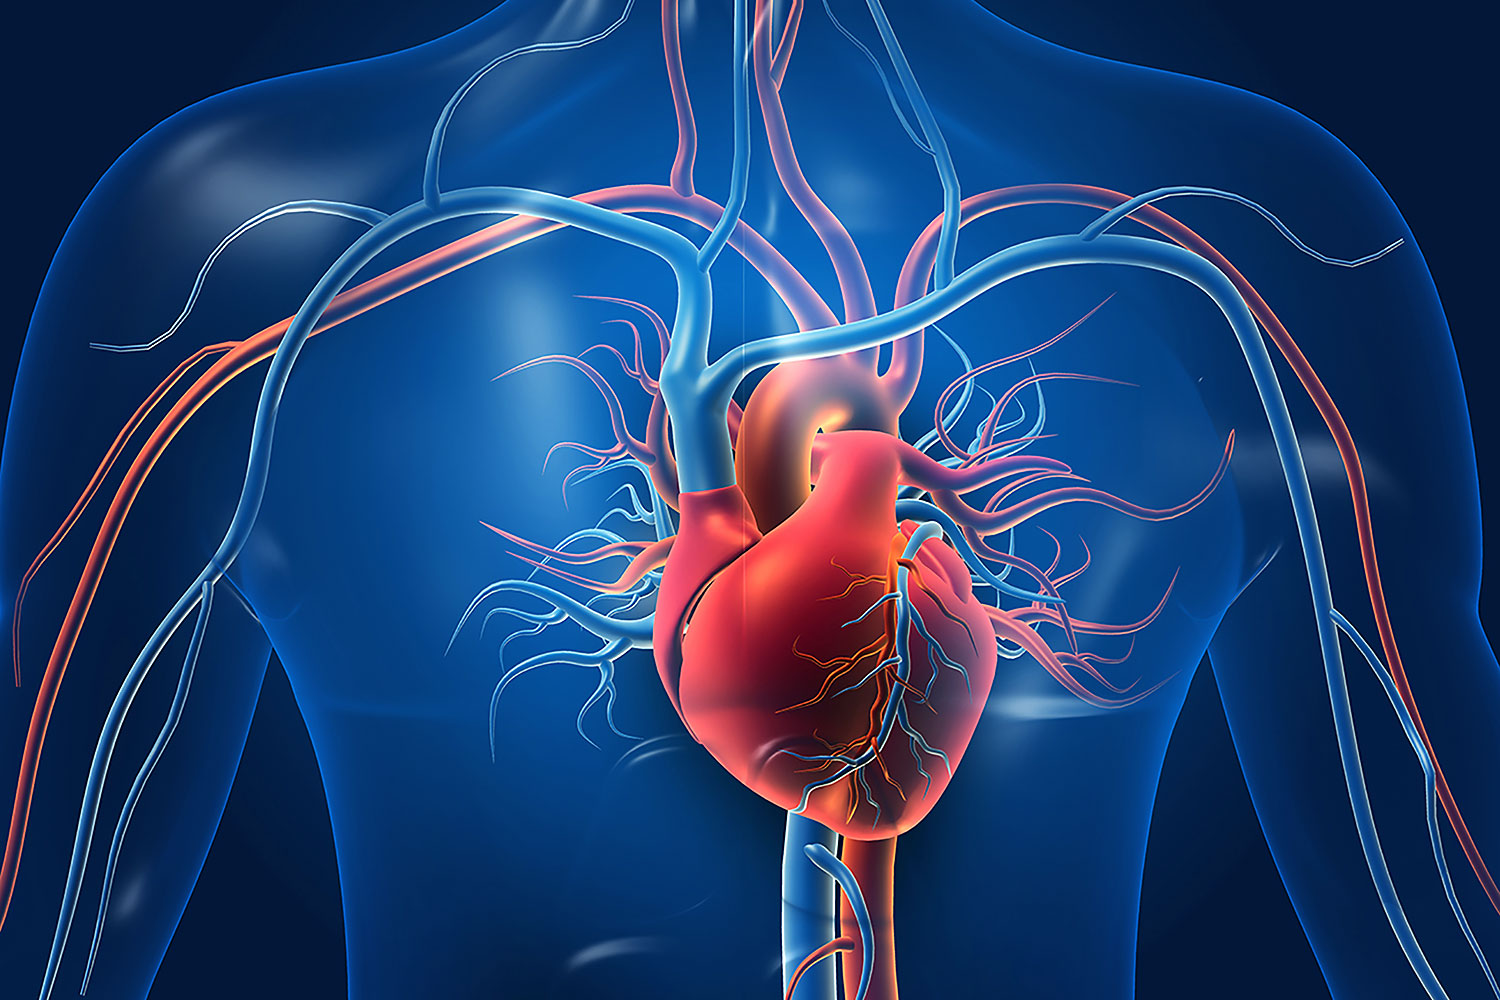

In [9]:
from IPython.display import Image
from sklearn.svm import SVC

Image('heart.jpg', width=600)

## Research paper overview

-------------

### Commentary

**Classifying research based on:**
- purpose: **applied** - application in medicine for the early detection of cardiac arrhythmia

- depth: **correlational** - we study how independent variable("diagnosis") is affected by several distinct dependent variables("age", "sex"..)

- data type: **quantitative** - we have mathematical, measurable and comparable data

- variable manipulation: **observational** - researchers observe patients

- conclusion: **inductive** - we want to generalize things based on sample of pacients

- time: **synchronous** - we assume that all data are collected at the same time

- source of information: **secondary** - the researchers read informations about patients from medical documents

- the method of data collection: **mixed** - a combination of data known about patients through medical records and ECG data measured under controlled conditions

Data collection method - **documentary** - **limited access**: the main source of data are the patient's medical records.

Data were collected **according to the rules of research ethics** - the names and id numbers of the patients were removed from the database for the privacy purpose.


---------
### Dataset

In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
#import scipy.stats as stats
import pylab
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
import plotly.express as px
from matplotlib.pyplot import figure
import scipy.stats as stats
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier


Importing data from https://archive.ics.uci.edu/ml/datasets/Arrhythmia

In [276]:
df = pd.read_csv('data_arrhythmia.csv', delimiter=';')
df.dataframeName = 'data_arrhythmia.csv'
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [277]:
df.shape

(452, 280)

No. **features** = 279 <br/> No. **patients** = 452

In [278]:
df.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


The dataset includes both categorical, ie. sex and continuous variables, ie. age. There are no monotone variables. Last column represents diagnosed heart arrhythmia class.

#### Data manipulation

In [279]:
df[df == '?'].count().nlargest(10)

J               376
P                22
T                 8
QRST              1
heart_rate        1
age               0
sex               0
height            0
weight            0
qrs_duration      0
dtype: int64

J value will be dropped and remaining missing values will be replaced using KNN.  

In [280]:
df.drop(['J'], axis=1, inplace=True)

In [281]:
from sklearn.impute import KNNImputer

df = df.replace('?', np.NaN)
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.isna().sum().nlargest(10)

age             0
sex             0
height          0
weight          0
qrs_duration    0
p-r_interval    0
q-t_interval    0
t_interval      0
p_interval      0
qrs             0
dtype: int64

<AxesSubplot:title={'center':'Number of unique values per column'}>

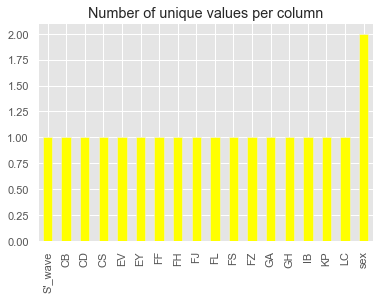

In [282]:
df.nunique().nsmallest(18).plot(kind="bar", title="Number of unique values per column", color='yellow', grid='bool')

In [283]:
df = df.loc[:, df.apply(pd.Series.nunique) != 1]

Last but not least, detecting parse data. 

In [284]:
df.astype(bool).sum(axis=0).nsmallest(80)

AB    1
AP    1
BC    1
BE    1
BM    1
     ..
AT    7
DF    7
AN    8
BF    8
CE    8
Length: 80, dtype: int64

In [285]:
categorical_cols = list(df.astype(bool).sum(axis=0).nsmallest(
    87).index)  #91 - this number can be arbitrary ofcourse, but we decide there is max. 13 dummy variables for one variable
df = pd.get_dummies(df, columns=categorical_cols)

Replacing outliers.

In [286]:
df['height']=df['height'].replace(608,108)
df['height']=df['height'].replace(780,180)

In [287]:
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,GR_3.2,CA_0.0,CA_24.0,CA_28.0,CA_32.0,CA_36.0,CA_40.0,CA_44.0,CR_0.0,CR_1.0
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0,1,0,0,0,0,0,0,1,0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0,1,0,0,0,0,0,0,1,0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0,1,0,0,0,0,0,0,0,1
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0,1,0,0,0,0,0,0,1,0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0,1,0,0,0,0,0,0,1,0
448,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0,1,0,0,0,0,0,0,1,0
449,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0,1,0,0,0,0,0,0,1,0
450,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,0,1,0,0,0,0,0,0,1,0


In [288]:
X = df.iloc[:, df.columns != 'diagnosis'].values
y = df.iloc[:, df.columns == 'diagnosis'].values

--------
### Splitting data

In [289]:
unscaled_train_X, unscaled_test_X, train_y, test_y = train_test_split(X, y, train_size=0.7, stratify=y)
print("Number of train samples: "+ str(unscaled_train_X.shape[0]))
print("Number of test samples: "+ str(unscaled_test_X.shape[0]))

Number of train samples: 316
Number of test samples: 136


----------
### Scaling data

In [290]:
scaler = StandardScaler().fit(unscaled_train_X)
train_values = scaler.transform(unscaled_train_X)
test_values = scaler.transform(unscaled_test_X)

---------
### Principal Component Analysis, PCA

Before using PCA, the first step is to scale the features in our data. 

In [291]:
pca = PCA().fit(train_values)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "n.o. Components", "y": "Explained Variance"}
)
fig.show()

The graph shows us that around **99% of variance can be explained with 150 features.**

In [292]:
pca = PCA(n_components=150).fit(train_values)
train_values = pca.transform(train_values)
test_values = pca.transform(test_values)

In [293]:
print(train_values.shape)
print(test_values.shape)

(316, 150)
(136, 150)


Using pythons library for PCA we reduced **number of features to 150**.

---------
### Classification 

In [225]:
#helper method
import sklearn.metrics as metrics

def spec_sens(y, X):
    confusion_matrix = metrics.confusion_matrix(y, X)
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]
    TN = confusion_matrix[0][0]

    sensitivity = TP/(TP+FN)
    specifity = TN/(TN+FP)

    print("sensitivity: ", sensitivity)
    print("specifity: ", specifity)

#### Logistic Regression

In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score

cv = KFold(n_splits=5, shuffle=True)
logmodel = LogisticRegression(multi_class='multinomial')
log_parameters = {'solver':('newton-cg', 'lbfgs', 'sag'),'penalty':('none', 'l2') ,'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
log_clf = GridSearchCV(logmodel, log_parameters, cv=cv)

# execute search
log_result = log_clf.fit(train_values, train_y)
# summarize result
print('Best Score: %s' % log_result.best_score_)
print('Best Hyperparameters: %s' % log_result.best_params_)

Best Score: 0.6676587301587301
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}


In [181]:
log_model = LogisticRegression(C = 0.01, penalty='l2',solver = 'sag').fit(train_values, train_y)
log_score = log_model.score(test_values, test_y)
log_samples = accuracy_score(log_model.predict(test_values), test_y, normalize=False)
print("accuracy: " + str(log_score))
spec_sens(test_y, log_model.predict(test_values))
print("n.o. correctly classified samples: "+ 
      str(log_samples))

accuracy: 0.6985294117647058
sensitivity:  0.5384615384615384
specifity:  0.972972972972973
n.o. correctly classified samples: 95


Logisitic Regression is able to fit with **69.85% accuracy** or **95/136 samples**.

#### SVM

In [182]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

cv = KFold(n_splits=5, shuffle=True)
svmmodel = SVC()
svm_parameters = {'gamma': [0.001, 0.01, 1], 'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
svm_clf = GridSearchCV(svmmodel, svm_parameters, cv=cv)

# execute search
svm_result = svm_clf.fit(train_values, train_y)
# summarize result
print('Best Score: %s' % svm_result.best_score_)
print('Best Hyperparameters: %s' % svm_result.best_params_)

Best Score: 0.6550595238095237
Best Hyperparameters: {'C': 10, 'gamma': 0.001}


In [183]:
svm_model = SVC(C=10, gamma=0.001).fit(train_values, train_y)
svm_score = svm_model.score(test_values, test_y)
svm_samples = accuracy_score(svm_model.predict(test_values), test_y, normalize=False)
print("accuracy: " + str(svm_score))
spec_sens(test_y, svm_model.predict(test_values))
print("n.o. correctly classified samples: "+ 
      str(svm_samples))

accuracy: 0.7205882352941176
sensitivity:  0.5833333333333334
specifity:  0.971830985915493
n.o. correctly classified samples: 98


SVM is able to fit with **72.06% accuracy** or **98/136 samples**.

#### K-Nearest Neighbors (KNN) Algorithm

In [184]:
from sklearn.neighbors import KNeighborsClassifier

cv = KFold(n_splits=5, shuffle=True)
knnmodel = KNeighborsClassifier()
knn_parameters = {'n_neighbors':[3,5,11,19], 'weights':['uniform', 'distance'], 'metric':['euclidean', 'manhattan']}
knn_clf = GridSearchCV(knnmodel, knn_parameters, cv=cv)

# execute search
knn_result = knn_clf.fit(train_values, train_y)
# summarize result
print('Best Score: %s' % knn_result.best_score_)
print('Best Hyperparameters: %s' % knn_result.best_params_)

Best Score: 0.5981646825396825
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


In [186]:
knn_model = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 3, weights= 'uniform').fit(train_values, train_y)
knn_score = knn_model.score(test_values, test_y)
knn_samples = accuracy_score(knn_model.predict(test_values), test_y, normalize=False)
print("accuracy: " + str(knn_score))
spec_sens(test_y, knn_model.predict(test_values))
print("n.o. correctly classified samples: "+ 
      str(knn_samples))

accuracy: 0.6176470588235294
sensitivity:  0.3076923076923077
specifity:  1.0
n.o. correctly classified samples: 84


KNN is able to fit with **61.76% accuracy** or **84/136 samples**.

#### Random Forest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier

cv = KFold(n_splits=5, shuffle=True)
rfcmodel = RandomForestClassifier()
param_grid = {'max_features': [70,100,125],
          'max_depth': [12,14, 50],
           'max_leaf_nodes':[30,50,70]}
rfc_clf = GridSearchCV(rfcmodel, param_grid, cv=cv)

# execute search
rfc_result = rfc_clf.fit(train_values, train_y)
# summarize result
print('Best Score: %s' % rfc_result.best_score_)
print('Best Hyperparameters: %s' % rfc_result.best_params_)

Best Score: 0.6170634920634922
Best Hyperparameters: {'max_depth': 14, 'max_features': 70, 'max_leaf_nodes': 70}


In [143]:
rfc_model = RandomForestClassifier(bootstrap= True, max_depth= 14, max_features= 70, max_leaf_nodes= 70).fit(train_values, train_y)
rfc_score = rfc_model.score(test_values, test_y)
rfc_samples = accuracy_score(rfc_model.predict(test_values), test_y, normalize=False)
print("accuracy: " + str(rfc_score))
spec_sens(test_y, rfc_model.predict(test_values))
print("n.o. correctly classified samples: "+ 
      str(rfc_samples))

accuracy: 0.6544117647058824
sensitivity:  0.4166666666666667
specifity:  0.9859154929577465
n.o. correctly classified samples: 89


 Random Forest Classifier is able to fit with **65.44% accuracy** or **89/136 samples**.

#### Comparison

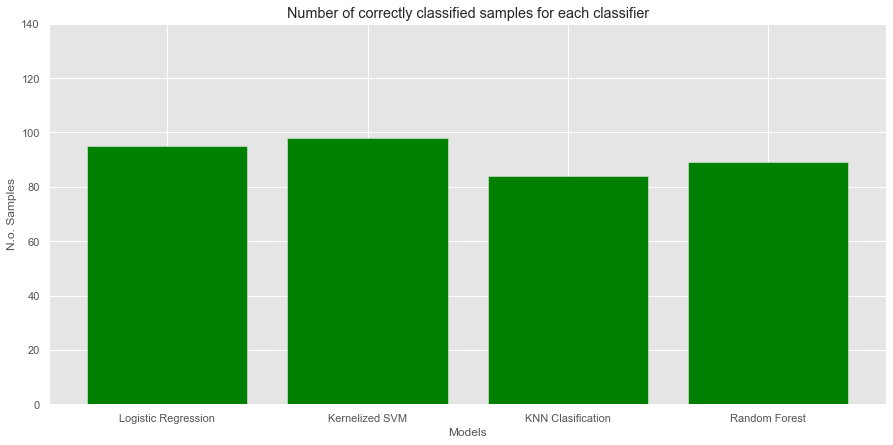

In [187]:
scores= [log_score, svm_score, knn_score, rfc_score]
samples = [log_samples, svm_samples, knn_samples, rfc_samples]

names = ['Logistic Regression','Kernelized SVM', 'KNN Clasification', 'Random Forest']

plt.style.use('ggplot')
plt.figure(figsize=(15,7))
ax = plt.gca()
ax.set_ylim([0, 140])

x = names
energy = samples

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Models")
plt.ylabel("N.o. Samples")
plt.title("Number of correctly classified samples for each classifier")

plt.xticks(x_pos, x)

plt.show()

---------
#### Conclusion

When the dataset was cross-validated and tested, the maximum accuracy was found to be obtained by SVM with 70.59% accuracy. The fact that the SVM is giving the best results is the same as in the paper however the accuracy of all the models is much lower.

# Research Expansion 

---------
## Statistical Analysis

### Normality Testing

One of the common assumptions in statistical tests and classifiers is the **normality of the data**.<br> We will check the normality by using:
* Q-Q plot 
* boxplot 
* histogram
* skewness and kurtosis
* Lilliefors test

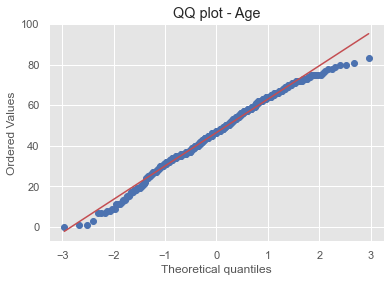

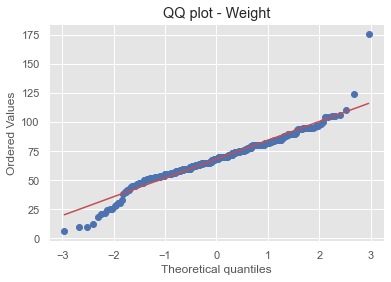

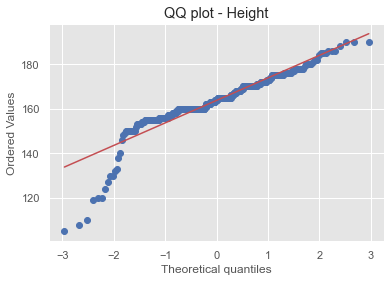

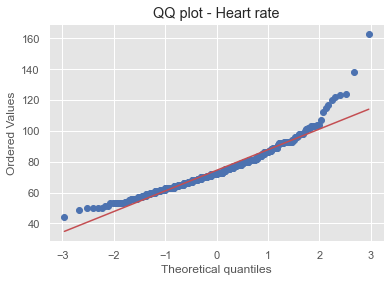

In [294]:
stats.probplot(df["age"].values, dist="norm", plot=pylab)
pylab.title("QQ plot - Age")
pylab.show()
stats.probplot(df["weight"].values, dist="norm", plot=pylab)
pylab.title("QQ plot - Weight")
pylab.show()
stats.probplot(df["height"].values, dist="norm", plot=pylab)
pylab.title("QQ plot - Height")
pylab.show()
stats.probplot(df["heart_rate"].values, dist="norm", plot=pylab)
pylab.title("QQ plot - Heart rate")
pylab.show()

**If the data is normally distributed, the points in the QQ-normal plot lie on a straight diagonal line.**

Text(0.5, 1.0, 'Box plot - Heart rate')

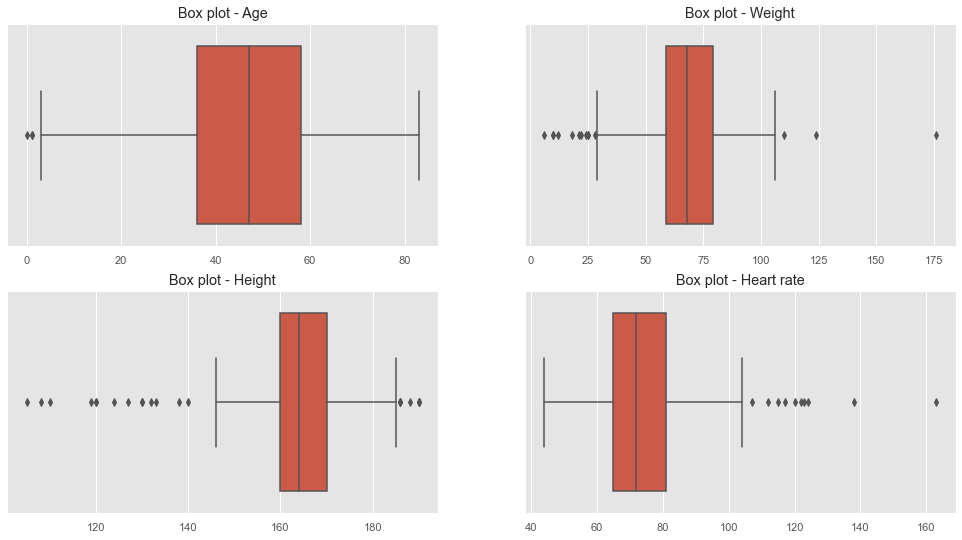

In [295]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(17, 9))
sns.boxplot(df["age"].values, ax=axes[0, 0]).set_title('Box plot - Age')
sns.boxplot(df["weight"].values, ax=axes[0, 1]).set_title('Box plot - Weight')
sns.boxplot(df["height"].values, ax=axes[1, 0]).set_title('Box plot - Height')
sns.boxplot(df["heart_rate"].values, ax=axes[1, 1]).set_title('Box plot - Heart rate')

**If a box plot has equal proportions around the median, we can say distribution is symmetric or normal**

Text(0.5, 1.0, 'Histogram - Heart rate')

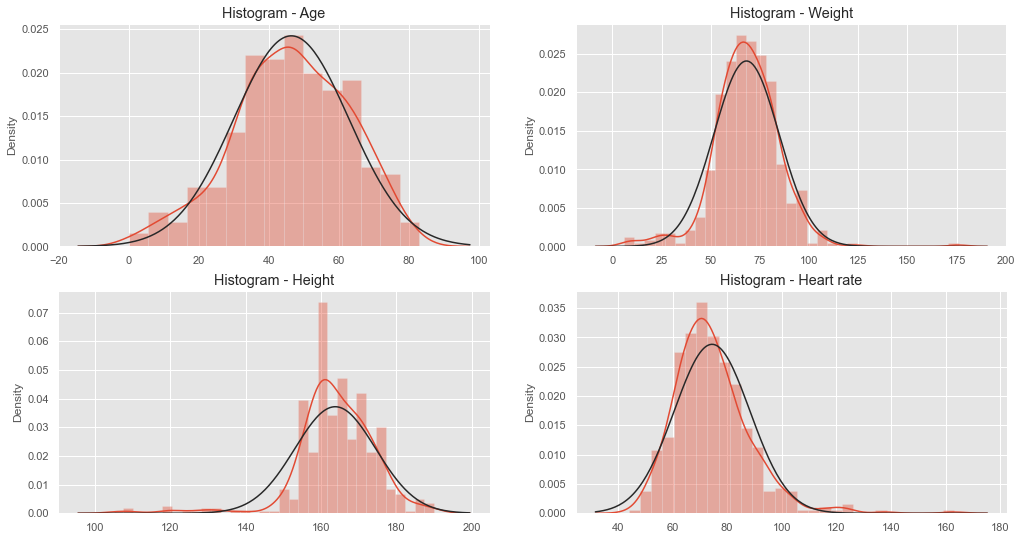

In [296]:
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(17, 9))

sns.distplot(df["age"].values, fit=norm, ax=axes[0, 0]).set_title('Histogram - Age')
sns.distplot(df["weight"].values, fit=norm, ax=axes[0, 1]).set_title('Histogram - Weight')
sns.distplot(df["height"].values, fit=norm, ax=axes[1, 0]).set_title('Histogram - Height')
sns.distplot(df["heart_rate"].values, fit=norm, ax=axes[1, 1]).set_title('Histogram - Heart rate')

mozda ovdje ubacit dio sa samplingom ..?

### Testing correlation

In [297]:
df1 = df.groupby(df.diagnosis).agg({"age": list, "height": list, "weight": list, "heart_rate": list})
df1

,age,height,weight,heart_rate
diagnosis,,,,
1.0,"[55.0, 40.0, 49.0, 44.0, 45.0, 44.0, 47.0, 46....","[175.0, 160.0, 162.0, 168.0, 165.0, 160.0, 150...","[94.0, 52.0, 54.0, 56.0, 86.0, 88.0, 48.0, 58....","[71.0, 70.0, 67.0, 64.0, 72.0, 72.0, 76.0, 70...."
2.0,"[56.0, 51.0, 54.0, 37.0, 79.0, 19.0, 17.0, 60....","[164.0, 160.0, 160.0, 171.0, 150.0, 165.0, 170...","[65.0, 83.0, 63.0, 85.0, 60.0, 50.0, 61.0, 83....","[79.0, 71.0, 54.0, 70.0, 74.0, 67.0, 86.0, 80...."
3.0,"[62.0, 45.0, 33.0, 50.0, 67.0, 46.0, 59.0, 45....","[170.0, 177.0, 168.0, 170.0, 171.0, 170.0, 160...","[72.0, 72.0, 105.0, 80.0, 67.0, 80.0, 68.0, 74...","[70.0, 63.0, 70.0, 70.0, 81.0, 97.0, 60.0, 64...."
4.0,"[69.0, 75.0, 51.0, 40.0, 64.0, 51.0, 63.0, 40....","[176.0, 156.0, 165.0, 162.0, 155.0, 156.0, 175...","[75.0, 55.0, 76.0, 65.0, 88.0, 60.0, 80.0, 70....","[80.0, 89.0, 81.0, 76.0, 85.0, 73.0, 89.0, 89...."
5.0,"[69.0, 1.0, 35.0, 62.0, 1.0, 73.0, 48.0, 0.0, ...","[160.0, 110.0, 160.0, 165.0, 180.0, 160.0, 178...","[71.0, 10.0, 51.0, 70.0, 6.0, 80.0, 80.0, 10.0...","[98.0, 104.0, 92.0, 103.0, 138.0, 103.0, 102.0..."
6.0,"[56.0, 30.0, 53.0, 45.0, 41.0, 72.0, 46.0, 45....","[165.0, 170.0, 175.0, 175.0, 159.0, 160.0, 165...","[64.0, 73.0, 85.0, 80.0, 55.0, 70.0, 66.0, 71....","[53.0, 56.0, 51.0, 53.0, 53.0, 57.0, 56.0, 56...."
7.0,"[75.0, 40.0, 67.0]","[190.0, 176.0, 168.0]","[80.0, 74.0, 65.0]","[73.0, 86.0, 63.0]"
8.0,"[75.0, 67.0]","[190.0, 163.0]","[80.0, 78.0]","[63.0, 69.0]"
9.0,"[75.0, 68.0, 73.0, 66.0, 62.0, 68.0, 44.0, 61....","[159.0, 161.0, 158.0, 156.0, 176.0, 146.0, 170...","[59.0, 70.0, 72.0, 80.0, 73.0, 62.0, 84.0, 77....","[72.0, 63.0, 80.0, 64.0, 64.0, 61.0, 77.0, 56...."


#### Correlation of sex and diagnosis

First, we will focus on the categorical variables "sex" and "diagnosis". We use the **$\chi^2$ test** to test correlation. We set hypotheses : <br> **<br> $ H_0 = $ no relationship exists on the categorical variables in the population, they are independent. <br> $H_1 = $ relationship exists on the categorical variables in the population, they are dependent.** <br> <br> If they are independent, they are obviously uncorrelated.

In [298]:
freq = pd.crosstab(df["sex"], df["diagnosis"])
freq.transpose()

sex,0.0,1.0
diagnosis,,
1.0,85,160
2.0,18,26
3.0,15,0
4.0,11,4
5.0,4,9
6.0,14,11
7.0,3,0
8.0,2,0
9.0,4,5


<AxesSubplot:xlabel='diagnosis'>

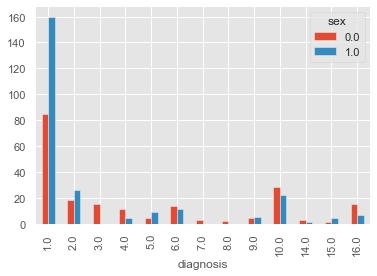

In [299]:
freq.transpose().plot.bar()

In [300]:
from scipy.stats import chi2_contingency
import math

chi2, p, dof, ex = chi2_contingency(pd.crosstab(df["sex"], df["diagnosis"]))

d = {'P value chi square test': [p]}
pd.DataFrame(data=d, index=["Variables sex and diagnosis"])

,P value chi square test
Variables sex and diagnosis,5.342221e-07


As we can see from the above results, since the p value is less than $0.05$, at the significance level of $5\%$ we can reject $H_0$, i.e. **we say that the variables are correlated**. <br> <br>
To examine how strong this correlation is, we use the **Cramer coefficient V**.  <br> <br> $V = \sqrt{ \frac{\chi ^2}{n(q-1)}}$,  <br> <br>where, <br> <br> n is the size of sample, q is the minimum of numbers rows and columns and $\chi^2$ is test statistics.


In [301]:
n = df["sex"].size
q = min(pd.crosstab(df["sex"], df["diagnosis"]).shape)
V = math.sqrt(chi2 / (n * (q - 1)))

d = {'Cramér s V': [V]}
pd.DataFrame(data=d, index=["Variables sex and diagnosis"])

,Cramér s V
Variables sex and diagnosis,0.340369


Since the value is greater than $0.3$, we can conclude that there is a **medium correlation** of these variables.

#### Correlation between age, height, weight and heart rate to diagnosis

The next thing is to examine the correlation of the continuous variables of a given set with a variable diagnosis that is categorical. For practical reasons, we decide to take: age, height, weight and heart rate.

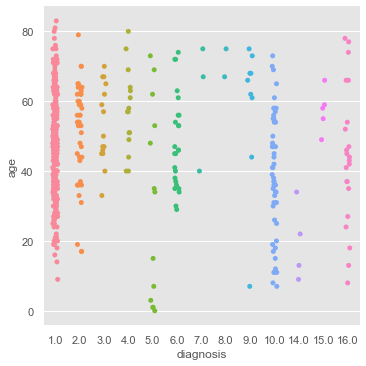

In [302]:
sns.catplot(x="diagnosis", y="age", data=df)

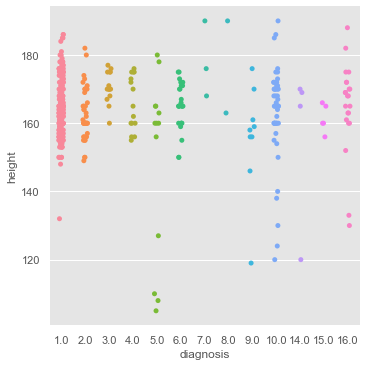

In [303]:
sns.catplot(x="diagnosis", y="height", data=df)

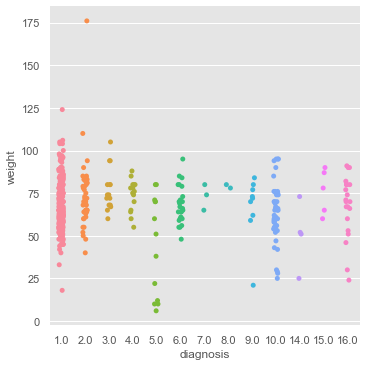

In [304]:
sns.catplot(x="diagnosis", y="weight", data=df)

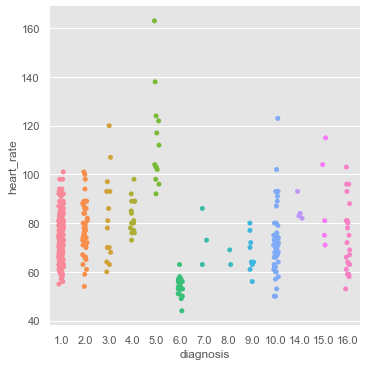

In [305]:
sns.catplot(x="diagnosis", y="heart_rate", data=df)

The first idea is to implement a **one-factor ANOVA**, but an important assumption that we must check is the condition of equal variance in all samples, the so-called. condition of homoskedasticity. We use the **Barlett test** for this purpose.
<br> <br> $ H_0 =  \sigma_1 = \sigma_2 = \ldots = \sigma_{16}$. <br> $H_1 = \sigma_i \neq \sigma_j$ for at least one pair $(i,j)$. <br> <br>

In [306]:
from scipy.stats import bartlett

stat_1, p_1 = bartlett(df1["age"][1], df1["age"][2], df1["age"][3], df1["age"][4], df1["age"][5], df1["age"][6],
                       df1["age"][7], df1["age"][8], df1["age"][9], df1["age"][10], df1["age"][14], df1["age"][15],
                       df1["age"][16])
stat_2, p_2 = bartlett(df1["height"][1], df1["height"][2], df1["height"][3], df1["height"][4], df1["height"][5],
                       df1["height"][6], df1["height"][7], df1["height"][8], df1["height"][9], df1["height"][10],
                       df1["height"][14], df1["height"][15], df1["height"][16])
stat_3, p_3 = bartlett(df1["weight"][1], df1["weight"][2], df1["weight"][3], df1["weight"][4], df1["weight"][5],
                       df1["weight"][6], df1["weight"][7], df1["weight"][8], df1["weight"][9], df1["weight"][10],
                       df1["weight"][14], df1["weight"][15], df1["weight"][16])
stat_3, p_4 = bartlett(df1["heart_rate"][1], df1["heart_rate"][2], df1["heart_rate"][3], df1["heart_rate"][4],
                       df1["heart_rate"][5], df1["heart_rate"][6], df1["heart_rate"][7], df1["heart_rate"][8],
                       df1["heart_rate"][9], df1["heart_rate"][10], df1["heart_rate"][14], df1["heart_rate"][15],
                       df1["heart_rate"][16])

d = {'Age': [p_1], 'Height': [p_2], 'Weight': [p_3], 'Heart rate': [p_4]}
pd.DataFrame(data=d, index=["P value of Barlett s test"])

,Age,Height,Weight,Heart rate
P value of Barlett s test,0.002236,7.456836e-20,0.000037,1.212595e-12


As we can see from the above results, since the p value is less than $0.05$ for each variable, at the significance level of $5\%$ we can reject $H_0$, i.e. **we say that there is difference in variances between the groups**. <br>

So, since the preconditions for ANOVA are not satisfied, we will apply a somewhat statistically weaker but more robust **Kruskal–Wallis test**. <br> **<br> $ H_0 = $ no relationship exists on the categorical variables in the population, they are independent. <br> $H_1 = $ relationship exists on the categorical variables in the population, they are dependent.** <br> <br> If they are independent, they are obviously uncorrelated.

In [307]:

stat_age, p_age = stats.kruskal(df1["age"][1], df1["age"][2], df1["age"][3], df1["age"][4], df1["age"][5],
                                df1["age"][6], df1["age"][7] + df1["age"][8], df1["age"][9], df1["age"][10],
                                df1["age"][14] + df1["age"][15], df1["age"][16])
stat_age, p_weight = stats.kruskal(df1["weight"][1], df1["weight"][2], df1["weight"][3], df1["weight"][4],
                                   df1["weight"][5], df1["weight"][6], df1["weight"][7] + df1["weight"][8],
                                   df1["weight"][9], df1["weight"][10], df1["weight"][14] + df1["weight"][15],
                                   df1["weight"][16])
stat_age, p_height = stats.kruskal(df1["height"][1], df1["height"][2], df1["height"][3], df1["height"][4],
                                   df1["height"][5], df1["height"][6], df1["height"][7] + df1["height"][8],
                                   df1["height"][9], df1["height"][10], df1["height"][14] + df1["height"][15],
                                   df1["height"][16])
stat_3, p_4 = stats.kruskal(df1["heart_rate"][1], df1["heart_rate"][2], df1["heart_rate"][3], df1["heart_rate"][4],
                            df1["heart_rate"][5], df1["heart_rate"][6], df1["heart_rate"][7], df1["heart_rate"][8],
                            df1["heart_rate"][9], df1["heart_rate"][10], df1["heart_rate"][14], df1["heart_rate"][15],
                            df1["heart_rate"][16])

d = {'Age': [p_1], 'Height': [p_2], 'Weight': [p_3], 'Heart rate': [p_4]}
pd.DataFrame(data=d, index=["P value of Barlett s test"])

,Age,Height,Weight,Heart rate
P value of Barlett s test,0.002236,7.456836e-20,0.000037,4.957411e-22


As we can see from the above results, since the p value is less than $0.05$, at the significance level of $5\%$ we can reject $H_0$, i.e. **we say that the diagnosis and those variable are correlated**.

What still seems useful to us, is checking the **high correlation using correlation matrix** between any two variables in the data and  preferably drop one from each pair because all the relevant information about that variable are containted by the second one.

In [308]:
corr_matrix = df.corr()
columns = list(df.columns)

for c in columns:
    if (corr_matrix[c].nlargest(2)[1] > 0.99):
        print("Positive correlation: ", c)
        print(corr_matrix[c].nlargest(2))
    if (corr_matrix[c].nsmallest(2)[0] < -0.9999):
        print("Negative correlation: ", c)
        print(corr_matrix[c].nsmallest(1))

Negative correlation:  AB_0.0
AB_1.0   -1.0
Name: AB_0.0, dtype: float64
Negative correlation:  AB_1.0
AB_0.0   -1.0
Name: AB_1.0, dtype: float64
Negative correlation:  AP_0.0
AP_1.0   -1.0
Name: AP_0.0, dtype: float64
Negative correlation:  AP_1.0
AP_0.0   -1.0
Name: AP_1.0, dtype: float64
Negative correlation:  BC_0.0
BC_1.0   -1.0
Name: BC_0.0, dtype: float64
Negative correlation:  BC_1.0
BC_0.0   -1.0
Name: BC_1.0, dtype: float64
Negative correlation:  BE_0.0
BE_1.0   -1.0
Name: BE_0.0, dtype: float64
Negative correlation:  BE_1.0
BE_0.0   -1.0
Name: BE_1.0, dtype: float64
Positive correlation:  BM_0.0
BM_0.0    1.0
HO_0.0    1.0
Name: BM_0.0, dtype: float64
Negative correlation:  BM_0.0
BM_32.0   -1.0
Name: BM_0.0, dtype: float64
Positive correlation:  BM_32.0
BM_32.0    1.0
HO_-0.4    1.0
Name: BM_32.0, dtype: float64
Negative correlation:  BM_32.0
BM_0.0   -1.0
Name: BM_32.0, dtype: float64
Negative correlation:  Cf_0.0
Cf_1.0   -1.0
Name: Cf_0.0, dtype: float64
Positive correla

Positive correlation:  R'_wave_0.0
R'_wave_0.0    1.0
GG_0.0         1.0
Name: R'_wave_0.0, dtype: float64
Positive correlation:  R'_wave_24.0
R'_wave_24.0    1.0
GG_1.9          1.0
Name: R'_wave_24.0, dtype: float64
Negative correlation:  AG_0.0
AG_1.0   -1.0
Name: AG_0.0, dtype: float64
Negative correlation:  AG_1.0
AG_0.0   -1.0
Name: AG_1.0, dtype: float64
Negative correlation:  BU_0.0
BU_1.0   -1.0
Name: BU_0.0, dtype: float64
Negative correlation:  BU_1.0
BU_0.0   -1.0
Name: BU_1.0, dtype: float64
Negative correlation:  DG_0.0
DG_1.0   -1.0
Name: DG_0.0, dtype: float64
Negative correlation:  DG_1.0
DG_0.0   -1.0
Name: DG_1.0, dtype: float64
Negative correlation:  DH_0.0
DH_1.0   -1.0
Name: DH_0.0, dtype: float64
Negative correlation:  DH_1.0
DH_0.0   -1.0
Name: DH_1.0, dtype: float64
Negative correlation:  DR_0.0
DR_1.0   -1.0
Name: DR_0.0, dtype: float64
Negative correlation:  DR_1.0
DR_0.0   -1.0
Name: DR_1.0, dtype: float64
Negative correlation:  DS_0.0
DS_1.0   -1.0
Name: DS

In [309]:
df.drop(['GS_0.0'], axis=1, inplace=True)
df.drop(['GS_-1.5'], axis=1, inplace=True)
df.drop(['GS_-1.2'], axis=1, inplace=True)
df.drop(['HO_-0.4'], axis=1, inplace=True)
df.drop(['HO_0.0'], axis=1, inplace=True)
df.drop(['IL_-4.5'], axis=1, inplace=True)
df.drop(['IL_-3.3'], axis=1, inplace=True)
df.drop(['IL_-0.9'], axis=1, inplace=True)
df.drop(['IL_0.0'], axis=1, inplace=True)
df.drop(['LB_0.0'], axis=1, inplace=True)
df.drop(['LB_0.5'], axis=1, inplace=True)
df.drop(['LB_0.8'], axis=1, inplace=True)

### Oversampling

We want to see is how much the patient is represented in each category. If this representation is unbalanced, we will apply oversampling.

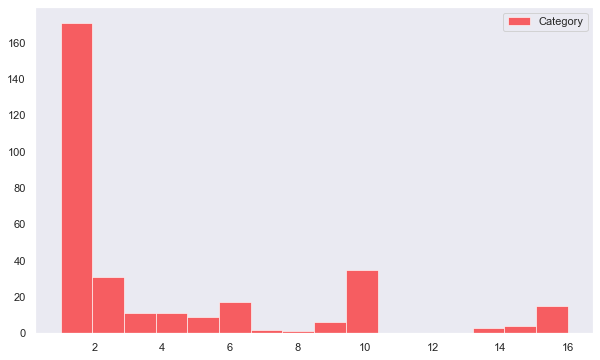

In [311]:
figure(figsize=(10, 6))
plt.hist(train_y, bins=16, label='Category', color='red', alpha=0.6)
plt.legend(loc='best')
plt.grid()
plt.show()

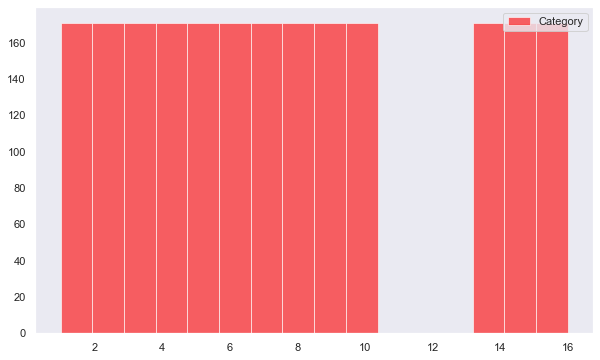

In [312]:
import numpy
sample = True
sampler = RandomOverSampler()
#sampler = BorderlineSMOTE()
#sampler = SMOTE()

if isinstance(sampler, BorderlineSMOTE) or isinstance(sampler, SMOTE):
    # remove examples of classes with few examples
    # necessary if using SMOTE
    to_delete = numpy.concatenate([train_y[train_y == 8], train_y[train_y == 7], train_y[train_y== 14], train_y[train_y== 15]])
    original_X = train_values
    original_y = train_y
    X = numpy.delete(original_X,to_delete)
    y = numpy.delete(original_y,to_delete[-1])
    
if sample:
    s_train_values, s_train_y = sampler.fit_resample(train_values, train_y)

sns.set_theme()

figure(figsize=(10, 6))
plt.hist(s_train_y, bins=16, label='Category', color='red', alpha=0.6)
plt.legend(loc='best')
plt.grid()
plt.show()

Running previous models on oversampled data.

### Logistic Regression

In [314]:
logmodel = LogisticRegression(multi_class='multinomial')
log_parameters = {'solver':('newton-cg', 'lbfgs', 'sag'),'penalty':('none', 'l2') ,'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
log_clf = GridSearchCV(logmodel, log_parameters, cv=cv)

# execute search
log_result = log_clf.fit(s_train_values, s_train_y)
# summarize result
print('Best Score: %s' % log_result.best_score_)
print('Best Hyperparameters: %s' % log_result.best_params_)

Best Score: 0.9802054863852616
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [321]:
log_model_s = LogisticRegression(C = 10, penalty='l2',solver = 'lbfgs').fit(s_train_values,  s_train_y)
log_score_s = log_model_s.score(test_values, test_y)
log_samples_s = accuracy_score(log_model_s.predict(test_values), test_y, normalize=False)
print("accuracy: " + str(log_score_s))
spec_sens(test_y, log_model_s.predict(test_values))
print("n.o. correctly classified samples: "+ 
      str(log_samples_s))

accuracy: 0.5661764705882353
sensitivity:  0.5555555555555556
specifity:  0.8928571428571429
n.o. correctly classified samples: 77


Logisitic Regression is able to fit with **56.62% accuracy** or **77/136 samples**.

### SVM

In [319]:
svmmodel = SVC()
svm_parameters = {'gamma': [0.001, 0.01, 1], 'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
svm_clf = GridSearchCV(svmmodel, svm_parameters, cv=cv)

# execute search
svm_result = svm_clf.fit(s_train_values, s_train_y)
# summarize result
print('Best Score: %s' % svm_result.best_score_)
print('Best Hyperparameters: %s' % svm_result.best_params_)

Best Score: 0.9986516853932585
Best Hyperparameters: {'C': 1, 'gamma': 1}


In [322]:
svm_model_s = SVC(C=1, gamma=1).fit(s_train_values, s_train_y)
svm_score_s = svm_model_s.score(test_values, test_y)
svm_samples_s = accuracy_score(svm_model_s.predict(test_values), test_y, normalize=False)
print("accuracy: " + str(svm_score_s))
spec_sens(test_y, svm_model.predict(test_values))
print("n.o. correctly classified samples: "+ 
      str(svm_samples_s))

accuracy: 0.5441176470588235
sensitivity:  0.16666666666666666
specifity:  0.9861111111111112
n.o. correctly classified samples: 74


SVM is able to fit with **54.41% accuracy** or **74/136 samples**.

### KNN

In [324]:
knnmodel = KNeighborsClassifier()
knn_parameters = {'n_neighbors':[3,5,11,19], 'weights':['uniform', 'distance'], 'metric':['euclidean', 'manhattan']}
knn_clf = GridSearchCV(knnmodel, knn_parameters, cv=cv)

# execute search
knn_result = knn_clf.fit(s_train_values, s_train_y)
# summarize result
print('Best Score: %s' % knn_result.best_score_)
print('Best Hyperparameters: %s' % knn_result.best_params_)


Best Score: 0.9766059317744711
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [325]:
knn_model_s = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, weights= 'distance').fit(s_train_values, s_train_y)
knn_score_s = knn_model_s.score(test_values, test_y)
knn_samples_s = accuracy_score(knn_model_s.predict(test_values), test_y, normalize=False)
print("accuracy: " + str(knn_score_s))
spec_sens(test_y, knn_model_s.predict(test_values))
print("n.o. correctly classified samples: "+ 
      str(knn_samples_s))


accuracy: 0.5514705882352942
sensitivity:  0.18181818181818182
specifity:  0.9137931034482759
n.o. correctly classified samples: 75


KNN is able to fit with **55.88% accuracy** or **76/136 samples**.

### Random Forest Classifier

In [ ]:
rfcmodel = RandomForestClassifier()
param_grid = {'max_features': [70,100,125],
          'max_depth': [12,14, 50],
           'max_leaf_nodes':[30,50,70]}
rfc_clf = GridSearchCV(rfcmodel, param_grid, cv=cv)

# execute search
rfc_result = rfc_clf.fit(s_train_values, s_train_target)
# summarize result
print('Best Score: %s' % rfc_result.best_score_)
print('Best Hyperparameters: %s' % rfc_result.best_params_)

In [ ]:
rfc_model_s = RandomForestClassifier(bootstrap= True, max_depth= 14, max_features= 70, max_leaf_nodes= 70).fit(s_train_values, s_train_y)
rfc_score_s = rfc_model_s.score(test_values, test_y)
rfc_samples_s = accuracy_score(rfc_model_s.predict(test_values), test_y, normalize=False)
print("accuracy: " + str(rfc_score_s))
spec_sens(test_y, rfc_model_s.predict(test_values))
print("n.o. correctly classified samples: "+ 
      str(rfc_samples_s))


Random Forest Classifier is able to fit with **52.97% accuracy** or **70/136 samples**.

### Comparison

We can see that the model classification didn't improve by using oversampling.

## Model upgrade

### Neural Network for classification

In [329]:
nn_model = MLPClassifier()
nn_parameters = {'hidden_layer_sizes': [(10,30,10),(20,), (10,), (15,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.00001, 0.0001, 0.001, 0.05],
    'learning_rate': ['constant','adaptive'],}
nn_clf = GridSearchCV(nn_model, nn_parameters, cv=cv)

# execute search
nn_result = nn_clf.fit(train_values, train_y)
# summarize result
print('Best Score: %s' % nn_result.best_score_)
print('Best Hyperparameters: %s' % nn_result.best_params_)

Best Score: 0.6931547619047619
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}


In [331]:
nn_model = MLPClassifier(solver='lbfgs', alpha=0.05, hidden_layer_sizes=(15,), 
                         random_state=1, activation='tanh', learning_rate='adaptive').fit(train_values, train_y)
nn_score = nn_model.score(test_values, test_y)
nn_samples = accuracy_score(nn_model.predict(test_values), test_y, normalize=False)
print("accuracy: " + str(nn_score))
spec_sens(test_y, nn_model.predict(test_values))
print("n.o. correctly classified samples: "+ 
      str(nn_samples))

accuracy: 0.5882352941176471
sensitivity:  0.75
specifity:  0.8771929824561403
n.o. correctly classified samples: 80


Multy Layer Perceptron Classifier is able to fit with **58.82% accuracy** or **80/136 samples**.

### Linear SVM

In [332]:
lsvc_model = LinearSVC(multi_class='crammer_singer')
lsvc_parameters = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}
lsvc_clf = GridSearchCV(lsvc_model, lsvc_parameters, scoring = 'recall_weighted',cv=cv, return_train_score=True)

#executive search
lsvc_result = lsvc_clf.fit(train_values, train_y)
# summarize result
print('Best Score: %s' % lsvc_result.best_score_)
print('Best Hyperparameters: %s' % lsvc_result.best_params_)

Best Score: 0.6675595238095238
Best Hyperparameters: {'C': 0.01}


In [334]:
lsvc_model = LinearSVC(multi_class='crammer_singer', C=0.01).fit(train_values, train_y)
lsvc_score = lsvc_model.score(test_values, test_y)
lsvc_samples = accuracy_score(lsvc_model.predict(test_values), test_y, normalize=False)
print("accuracy: " + str(lsvc_score))
spec_sens(test_y, lsvc_model.predict(test_values))
print("n.o. correctly classified samples: "+ 
      str(lsvc_samples))

accuracy: 0.6397058823529411
sensitivity:  0.5555555555555556
specifity:  0.9206349206349206
n.o. correctly classified samples: 87


Linear SVM is able to fit with **63.97% accuracy** or **87/136 samples**.

### Decision Tree

In [335]:
dt_model = DecisionTreeClassifier()
dt_parameters = {'max_depth': [2, 3, 4, 5,6, 10, 20]}
dt_clf = GridSearchCV(dt_model, dt_parameters, scoring = 'recall_weighted',cv=cv, return_train_score=True)

#executive search
dt_result = dt_clf.fit(train_values, train_y)
# summarize result
print('Best Score: %s' % dt_result.best_score_)
print('Best Hyperparameters: %s' % dt_result.best_params_)

Best Score: 0.5855654761904762
Best Hyperparameters: {'max_depth': 3}


In [336]:
dt_model = DecisionTreeClassifier(max_depth=3).fit(train_values, train_y)
dt_score = dt_model.score(test_values, test_y)
dt_samples = accuracy_score(dt_model.predict(test_values), test_y, normalize=False)
print("accuracy: " + str(dt_score))
spec_sens(test_y, dt_model.predict(test_values))
print("n.o. correctly classified samples: "+ 
      str(dt_samples))

accuracy: 0.6029411764705882
sensitivity:  0.4166666666666667
specifity:  0.9565217391304348
n.o. correctly classified samples: 82


Decision Tree is able to fit with **60.29% accuracy** or **82/136 samples**.

### Comparison

In [337]:
scores= [log_score, svm_score, lsvc_score, knn_score, rfc_score, dt_score, nn_score]
samples = [log_samples, svm_samples, lsvc_samples, knn_samples, rfc_samples, dt_samples, nn_samples]

names = ['Logistic Regression','Kernelized SVM', 'Linear SVM', 'KNN Clasification', 'Random Forest','Decision Tree',
                'Neural Network']

table = pd.DataFrame ([scores], columns=names, index=['Scores'])
table=table.T
table

,Scores
Logistic Regression,0.698529
Kernelized SVM,0.720588
Linear SVM,0.639706
KNN Clasification,0.617647
Random Forest,0.654412
Decision Tree,0.602941
Neural Network,0.588235


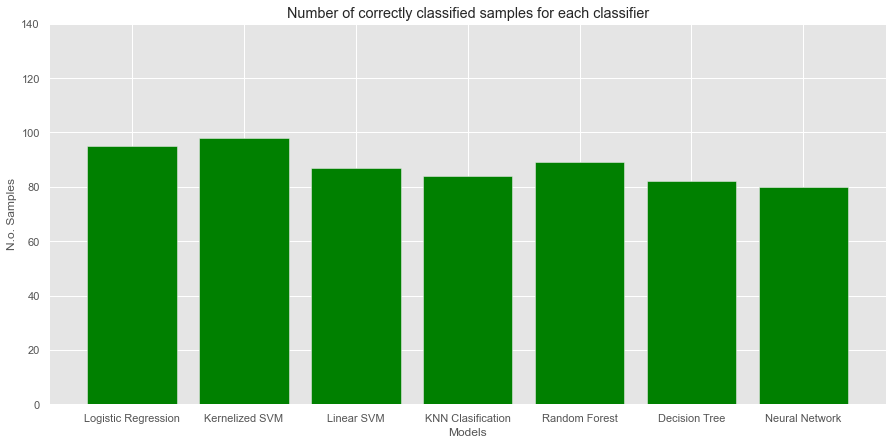

In [338]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
ax = plt.gca()
ax.set_ylim([0, 140])

x = names
energy = samples

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Models")
plt.ylabel("N.o. Samples")
plt.title("Number of correctly classified samples for each classifier")

plt.xticks(x_pos, x)

plt.show()

The best model is **kernalized SVM** with around 72% accuracy.